In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Load the dataset
file_path = 'Data/GroceryDataset.csv'
grocery_data = pd.read_csv(file_path)

In [4]:
# Initial Peek
grocery_data.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [5]:
# Initial Peek
grocery_data.tail()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...
1756,Snacks,$21.99,No Discount,NaN,"Takis, Rolled Tortilla Chips, Intense Nacho, 1...",$,"Intense Nacho Cheese Non-Spicy 1 oz bag, 5...",Takis Non-Spicy Cheese Tortilla Chips\nIndivid...


In [6]:
# Descriptive Statistics
grocery_data.describe(include='all')

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
count,1757,1754,1757,682,1757,1752,1739,1715
unique,19,184,42,483,1484,1,1401,1435
top,Snacks,$14.99,No Discount,No Reviews,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Pick Your Arrival Date at Checkout Gift Mess...,Item may be available in your local warehouse ...
freq,293,81,1626,61,4,1752,7,5


#### Based on the initial inspection of the "GroceryDataset.csv", here are the columns it contains:

**Sub Category: The category of the grocery item.
**Price: The price of the item, currently in a string format with a currency symbol.
**Discount: Information about any discounts on the item.
**Rating: Customer ratings with details on the number of reviews.
**Title: The title or name of the grocery item.
**Currency: The currency symbol for the price.
**Feature: Key features of the item.
**Product Description: A description of the product.

In [7]:
# Unique Value Inspection for a specific column
grocery_data['Price'].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

In [8]:
# Data Type Analysis
grocery_data.dtypes

Sub Category           object
Price                  object
Discount               object
Rating                 object
Title                  object
Currency               object
Feature                object
Product Description    object
dtype: object

In [9]:
# Count Missing Values
grocery_data.isnull().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [10]:
# Convert all price values to strings to ensure consistent format
grocery_data['Price'] = grocery_data['Price'].astype(str)

In [11]:
all(isinstance(item, str) for item in grocery_data['Price'])

True

** Before proceeding with any analysis, we need to convert the 'Price' and 'Rating' columns, which contain non-numeric characters.

In [12]:
#Remove Currency Symbols and Commas: 
#Prices might be formatted as strings with currency symbols and commas. 
#To Use string replacement functions to remove these.

grocery_data['Price'] = grocery_data['Price'].replace({'\$': '', ',': ''}, regex=True)

In [13]:
# Unique Value Inspection for a specific column
grocery_data['Price'].unique()

array(['56.99 ', '159.99 ', '44.99 ', '39.99 ', '59.99 ', '74.99 ',
       '29.99 ', '62.99 ', '299.99 ', '54.99 ', '89.99 ', '49.99 ',
       '99.99 ', '24.99 ', '72.99 ', '119.99 ', '109.99 ', '34.99 ',
       '27.99 ', '21.99 ', '20.99 ', '19.99 ', '439.99 ', '9.99 ',
       '14.99 ', '18.99 ', '21.49 ', '17.99 ', '23.99 ', '4.99 ',
       '12.99 ', '32.99 ', '13.79 ', '23.49 ', '22.99 ', '8.99 ',
       '15.99 ', '28.99 ', '16.49 ', '549.99 ', '17.49 ', '25.99 ',
       '11.69 ', '69.99 ', '21.79 ', '37.99 ', '139.99 ', '41.99 ',
       '18.49 ', '16.99 ', '36.99 ', '10.99 ', '61.99 ', '17.59 ',
       '11.99 ', '24.49 ', '10.49 ', '9.69 ', '8.19 ', '9.49 ', '12.49 ',
       '12.69 ', '31.99 ', '15.49 ', '46.99 ', '11.49 ', '16.39 ',
       '13.99 ', '38.99 ', '26.99 ', '13.49 ', '14.49 ', '26.69 ',
       '42.99 ', '45.99 ', '7.99 ', '25.69 ', '19.49 ', '12.09 ',
       '10.79 ', '17.89 ', '28.79 ', '84.99 ', '32.99through-83.99',
       '20.89 ', '9.79 ', '29.89 ', '199.99 ', '47

In [14]:
def handle_price_range(price_str):
    # Convert price to string if it's not
    price_str = str(price_str)

    if 'through-' in price_str:
        # Split the range into lower and upper values using 'through-'
        lower, upper = price_str.split('through-')

        return (float(lower) + float(upper)) / 2  # Calculate the average

    # Convert back to float for a consistent data type
    return float(price_str)

In [15]:
grocery_data['Price'] = grocery_data['Price'].apply(handle_price_range)

In [16]:
# Unique Value Inspection for a specific column
grocery_data['Price'].unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

In [17]:
#Extract Numeric Ratings: Ratings might be in a format like '4.3 out of 5 stars'. Extract the numeric part.

grocery_data['Numeric Rating'] = grocery_data['Rating'].str.extract('(\d+\.\d+|\d+)')

In [18]:
#If there are missing or non-standard entries, decide how to handle them—either leave them as NaN, 
#fill them with a default value, or use some imputation strategy.
grocery_data['Numeric Rating'] = pd.to_numeric(grocery_data['Numeric Rating'], errors='coerce')

In [19]:
# Counting NaN values in the 'Price' column
nan_count_price = grocery_data['Price'].isnull().sum()

# Counting NaN values in the 'Numeric Rating' column
nan_count_numeric_rating = grocery_data['Numeric Rating'].isnull().sum()

# Displaying the counts
print("Number of NaN values in Price column:", nan_count_price)
print("Number of NaN values in Numeric Rating column:", nan_count_numeric_rating)


Number of NaN values in Price column: 3
Number of NaN values in Numeric Rating column: 1140


*** To test the hypothesis about the relationship between product categories and the presence of NaN values in the 'Rating' column, we can perform an analysis to see the distribution of NaN values across different categories. This analysis will help us understand if certain categories are more prone to having missing ratings and inform our strategy for handling these NaN values.

In [20]:
# Count the number of NaN values in the 'Rating' column for each category
nan_counts_by_category = grocery_data.groupby('Sub Category')['Numeric Rating'].apply(lambda x: x.isnull().sum())

# Sort the counts for better visualization
sorted_nan_counts = nan_counts_by_category.sort_values(ascending=False)

print(sorted_nan_counts)

Sub Category
Snacks                          256
Candy                           135
Pantry & Dry Goods              127
Beverages & Water               124
Kirkland Signature Grocery      103
Household                        81
Paper & Plastic Products         74
Coffee                           58
Cleaning Supplies                57
Organic                          25
Laundry Detergent & Supplies     23
Floral                           19
Breakfast                        19
Gift Baskets                     14
Meat & Seafood                   14
Seafood                           6
Bakery & Desserts                 4
Deli                              1
Poultry                           0
Name: Numeric Rating, dtype: int64


In [21]:
# Calculate total items per category
total_items_per_category = grocery_data.groupby('Sub Category').size()

# Calculate NaN counts in the 'Rating' column for each category
nan_counts_by_category = grocery_data.groupby('Sub Category')['Numeric Rating'].apply(lambda x: x.isnull().sum())

In [22]:
# Calculate frequency as a percentage
nan_frequency_by_category = (nan_counts_by_category / total_items_per_category) * 100

print(nan_frequency_by_category)

Sub Category
Bakery & Desserts                12.121212
Beverages & Water                83.783784
Breakfast                        90.476190
Candy                            87.662338
Cleaning Supplies                60.638298
Coffee                           61.052632
Deli                              4.761905
Floral                           25.333333
Gift Baskets                     15.730337
Household                       100.000000
Kirkland Signature Grocery       84.426230
Laundry Detergent & Supplies     58.974359
Meat & Seafood                    9.722222
Organic                          75.757576
Pantry & Dry Goods               74.269006
Paper & Plastic Products         84.090909
Poultry                           0.000000
Seafood                          12.765957
Snacks                           87.372014
dtype: float64


In [23]:
# Count the occurrences of each category
category_counts = grocery_data['Sub Category'].value_counts()

# Convert the counts to a DataFrame for a tabular view
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Sub Category', 'Count']

# Display the DataFrame
print(category_counts_df)

                    Sub Category  Count
0                         Snacks    293
1             Pantry & Dry Goods    171
2                          Candy    154
3              Beverages & Water    148
4                 Meat & Seafood    144
5     Kirkland Signature Grocery    122
6                         Coffee     95
7              Cleaning Supplies     94
8                   Gift Baskets     89
9       Paper & Plastic Products     88
10                     Household     81
11                        Floral     75
12                       Seafood     47
13  Laundry Detergent & Supplies     39
14                       Organic     33
15             Bakery & Desserts     33
16                          Deli     21
17                     Breakfast     21
18                       Poultry      9


In [24]:
# Filter out the 'Meat and Seafood' category and create an explicit copy
meat_seafood_data = grocery_data[grocery_data['Sub Category'] == 'Meat & Seafood'].copy()

# Replace NaN values in 'Rating' with the mean rating of this category
mean_rating = meat_seafood_data['Numeric Rating'].mean()
meat_seafood_data['Numeric Rating'].fillna(mean_rating, inplace=True)

In [25]:
# Replace NaN values in 'Price' with the mean rating of this category
mean_rating = meat_seafood_data['Price'].mean()
meat_seafood_data['Price'].fillna(mean_rating, inplace=True)

In [26]:
meat_seafood_data.tail()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
1111,Meat & Seafood,219.99,No Discount,Rated 4.5 out of 5 stars based on 140 reviews.,"D'Artagnan Whole ABF Pekin Duck, (1/5.25 Lbs. ...",$,"6x ABF Whole Pekin Ducklings, 5.25lb average ...",D’Artagnan Whole Ducklings are raised with car...,4.5
1112,Meat & Seafood,159.99,No Discount,Rated 4.5 out of 5 stars based on 288 reviews.,"El Rey Del Pulpo, Large Cooked Octopus Tentacl...",$,"(6) Packs of 2 Cooked Octopus Tentacles, 14 oz...","In collaboration with Northwest Fish, El Rey d...",4.5
1113,Meat & Seafood,249.99,No Discount,Rated 4.8 out of 5 stars based on 84 reviews.,"Mahi Mahi Boneless, (26-27/Skinless 6 Oz. Port...",$,"Ships Uncooked, Frozen 6 Oz. Per Portion 1...","Mahi Mahi is a lean flesh fish with a mild, sw...",4.8
1114,Meat & Seafood,79.99,No Discount,Rated 4.2 out of 5 stars based on 104 reviews.,"Tsar Nicoulai Estate Smoked Sturgeon 6 oz, 6-c...",$,"Perishable, use or freeze within 21 days of de...","We select and handcraft the finest cuts, then ...",4.2
1115,Meat & Seafood,649.99,No Discount,Rated 4.7 out of 5 stars based on 305 reviews.,"Japanese Wagyu Filet Mignons Steaks, A5 Grade,...",$,"(8) A5 Wagyu Filet Mignons Steaks, 6 ounces ea...","Cut from the heart of the tenderloin, Authenti...",4.7


In [27]:
meat_seafood_data.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
972,Meat & Seafood,149.99,After $70 OFF,Rated 4.6 out of 5 stars based on 1237 reviews.,Ahi Tuna Individual Vacuum Packed Portion (26-...,$,"Wild, Boneless Ahi Tuna, Frozen 6 oz. Portio...",Ahi means “fire” in Hawaiian and refers to the...,4.600000
973,Meat & Seafood,229.99,After $60 OFF,No Reviews,Chicago Steak USDA Prime Beef Wet Aged Boneles...,$,8 USDA Prime Wet Aged Boneless NY Strips (12 O...,These tender Boneless Strips and juicy Gourmet...,4.213077
974,Meat & Seafood,239.99,After $60 OFF,Rated 4 out of 5 stars based on 108 reviews.,Alaska Home Pack Frozen Sea Cucumber - 3 Packs...,$,Please Check Below for Pack Contents Wild & ...,Semi-dehydrated then frozen Sea Cucumber Skins...,4.000000
975,Meat & Seafood,14.99,No Discount,NaN,"Crown Prince Smoked Oysters in Olive Oil, Fanc...",$,ASC Certified From Managed Fisheries Fresh...,WARNING:Consuming this product can expose you ...,4.213077
976,Meat & Seafood,204.99,After $40 - $80 OFF,through,Kansas City Steak Company USDA Choice Ribeye S...,$,Buy More and Save Aged Beef up to 28 Days ...,These steaks are cut by Kansas City Steak Comp...,4.213077


***Let's proceed with the linear regression analysis for the 'Meat and Seafood' category, focusing on the relationship between 'Price' and 'Numeric Rating'. We'll use Python's scikit-learn library to perform this analysis.

In [28]:
#let's prepare our independent variable (X) and dependent variable (y)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Price' is your independent variable and 'Numeric Rating' is your dependent variable
X = meat_seafood_data[['Price']]  # Independent variable
y = meat_seafood_data['Numeric Rating']  # Dependent variable

In [29]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Making predictions using the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.17544726731339705
R^2 Score: -0.0288891234889197


***The results from our linear regression analysis show a Mean Squared Error (MSE) of approximately 0.175 and an R² Score of approximately -0.029. Let's interpret these values: The R² Score, or coefficient of determination, is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variable(s) in a regression model. An R² Score can range from -∞ to 1. A score of 0 indicates that the model explains none of the variability of the response data around its mean. A score of 1 indicates that it explains all the variability. An R² Score of -0.029 suggests that the model does not fit the data well and, in fact, performs slightly worse than a simple horizontal line (which would represent the mean rating regardless of price). The negative R² Score is a sign that the linear model is not suitable for the data. This could be due to several reasons, such as: -There might not be a linear relationship between 'Price' and 'Numeric Rating'. -Other variables not included in the model might have a significant impact on 'Numeric Rating'. -There could be outliers or other issues in the data affecting the model's performance.

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'Price' and 'Numeric Rating' are your features and target variable
X = meat_seafood_data[['Price']]  # Independent variable (Price)
y = meat_seafood_data['Numeric Rating']  # Dependent variable (Rating)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
# Creating a range of values for 'Price' to plot the regression line
x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


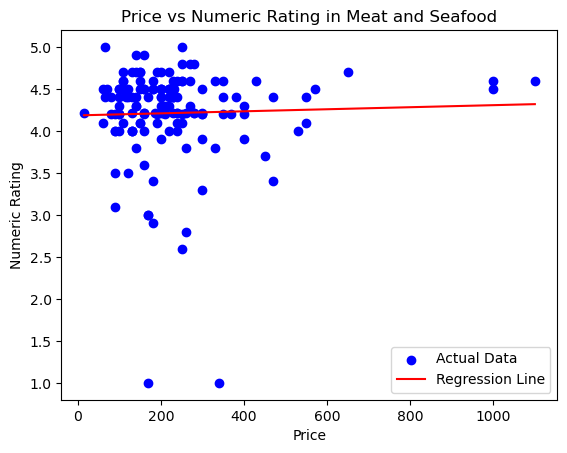

In [34]:
import matplotlib.pyplot as plt

# Plotting the actual data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Numeric Rating')
plt.title('Price vs Numeric Rating in Meat and Seafood')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

***Now I'd like to identify any relationship between the rating and description. Identifying relationships between 'Rating' and 'Product Description' involves analyzing text data and its correlation with numeric ratings. This kind of analysis falls under the umbrella of Natural Language Processing (NLP) and sentiment analysis

**Before analyzing the text, it's important to preprocess it. This typically includes:

Lowercasing: Convert all characters to lowercase to maintain consistency.
Removing Punctuation and Special Characters: These are usually not useful for text analysis.
Tokenization: Breaking down text into individual words (tokens).
Removing Stop Words: Stop words are common words (like 'the', 'is', 'in') that are usually irrelevant for analysis.
Stemming/Lemmatization: Reducing words to their base or root form.

#### Python libraries like NLTK or spaCy can be used for these preprocessing steps.

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...


True

In [36]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization and Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_text)